In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Crypten

In [ ]:
crypten_data = pd.read_csv('../chz-sok-nn-experiments/crypten_experiments/datasize_nn.csv',
                           skiprows=(lambda x: (x % 2 != 0)),
                           header=None,
                           )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
crypten_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

# crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)

# stdev_crypten = crypten_data.groupby('data_size')['epoch_duration'].std()
# print(stdev_crypten)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0       334.103506      0          64       7500    0.1213     115.350260
1       330.811416      1          64       7500    0.1621     115.805684
2       330.879101      2          64       7500    0.2365     115.004239
3       663.143592      0          64      15000    0.1244     117.321772
4       668.208064      1          64      15000    0.1715     117.992892
5       667.907569      2          64      15000    0.3042     116.648248
6      1315.456388      0          64      30000    0.2173     114.857552
7      1313.133419      1          64      30000    0.2820     116.150094
8      1328.334851      2          64      30000    0.4606     114.715113
9      2537.499688      0          64      60000    0.3578     115.763435
10     2612.373227      1          64      60000    0.5357     128.444723
11     2707.107256      2          64      60000    0.5746     115.908757
data_size
7500      995.794023
15000  

# Plaintext Torch

In [7]:
torch_data = pd.read_csv('../chz-sok-nn-experiments/torch_experiments/datasize_nn.csv',
                         header=None,
                         )
# epoch_duration, epoch, batch_size, data_size, accuracy, test_duration
torch_data.columns = ['epoch_duration', 'epoch', 'batch_size', 'data_size', 'accuracy', 'test_duration']

print(torch_data)

mean_torch = torch_data.groupby('data_size')['epoch_duration'].sum()
print(mean_torch)

stdev_torch = torch_data.groupby('data_size')['epoch_duration'].std()
print(stdev_torch)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         0.435262      0          64       7500    0.1000       0.254412
1         0.434570      1          64       7500    0.1001       0.255043
2         0.424085      2          64       7500    0.1070       0.249246
3         0.843772      0          64      15000    0.1897       0.250691
4         0.865831      1          64      15000    0.2169       0.258940
5         0.852454      2          64      15000    0.3104       0.249745
6         1.695686      0          64      30000    0.3749       0.252931
7         1.676609      1          64      30000    0.5303       0.248346
8         1.660102      2          64      30000    0.5827       0.248287
9         3.366926      0          64      60000    0.4655       0.258656
10        3.394307      1          64      60000    0.5639       0.253115
11        3.346369      2          64      60000    0.5989       0.254250
data_size
7500      1.293917
15000    

# NVFlare

In [8]:
nvflare_medians = []
nvflare_stdevs = []
for datasize in [7500, 15000, 30000, 60000]:
    nvflare_data = pd.read_csv(f'../chz-sok-nvflare-experiments/fl-nn/experiments/mnist/{datasize}/total_time.csv',
                header=None,
                )
    # total_duration, run_id, timestamp
    nvflare_data.columns = ['total_duration', 'run_id', 'timestamp']
    nvflare_medians.append(nvflare_data['total_duration'].median())
    nvflare_stdevs.append(nvflare_data['total_duration'].std())
print(nvflare_medians)
print(nvflare_stdevs)

[32.266808499999996, 34.601862, 38.126735499999995, 43.9894775]
[0.27761471526620013, 1.4845549290871625, 0.32480779484901245, 0.24260039343297243]


# Data Station

In [11]:
ds_data = pd.read_csv('../datastation-escrow/examples/training_scenario/mnist/mnist_total_time.csv',
                        header=None,
                        )
# total_duration, data_size
ds_data.columns = ['total_duration', 'data_size']

ds_medians = ds_data.groupby('data_size')['total_duration'].median()
ds_stdevs = ds_data.groupby('data_size')['total_duration'].std()

print(ds_medians)
print(ds_stdevs)

data_size
7500      7.317240
15000     8.502715
30000    10.905158
60000    15.664348
Name: total_duration, dtype: float64
data_size
7500     0.172851
15000    0.049639
30000    0.095084
60000    0.155105
Name: total_duration, dtype: float64


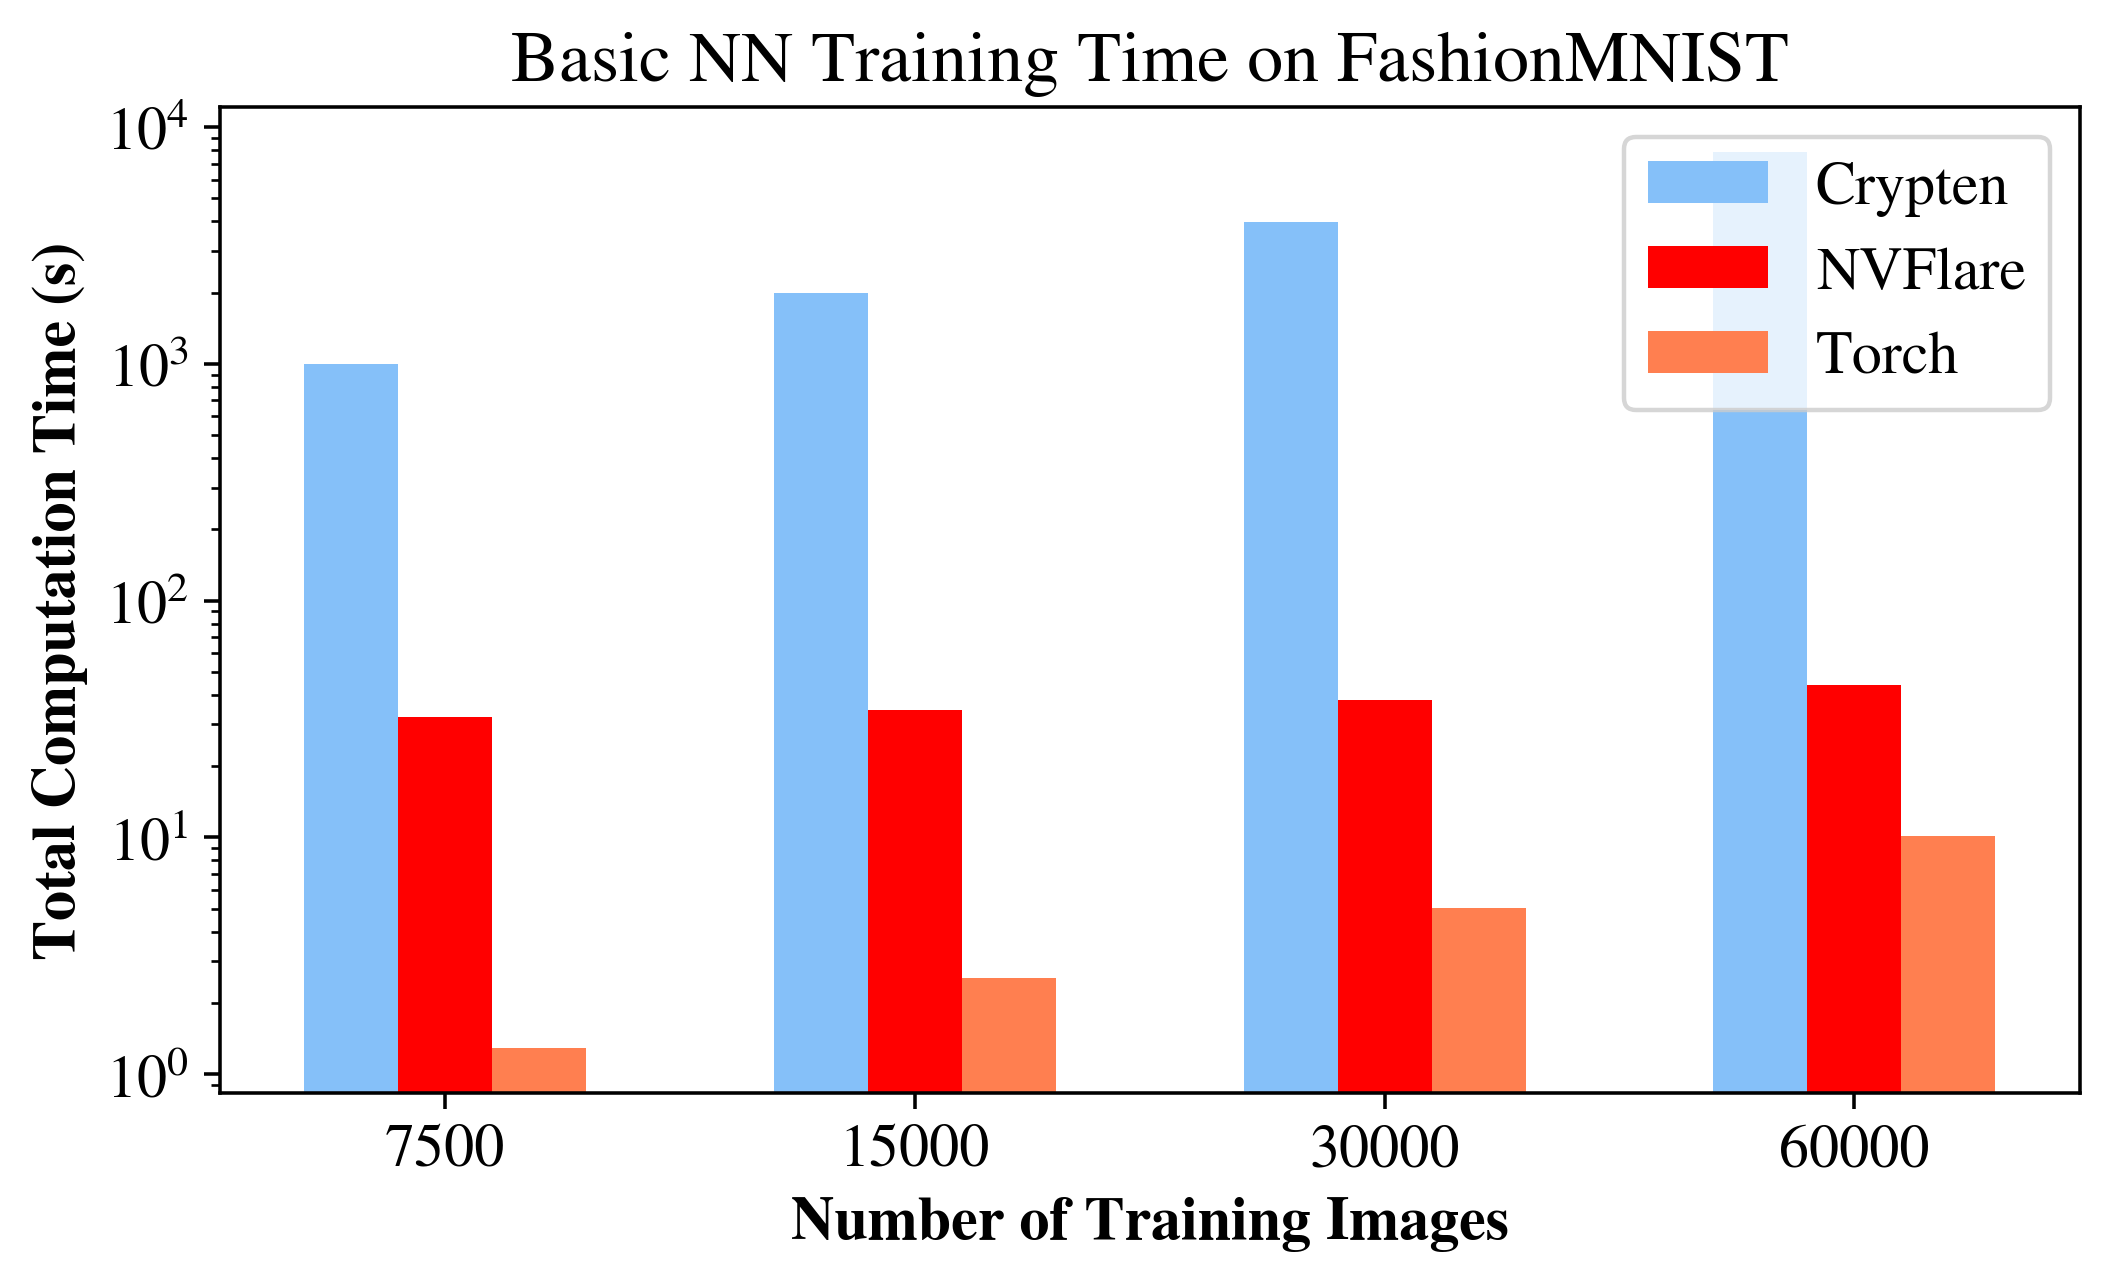

In [9]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis, width=width, height = nvflare_medians, label = "NVFlare", color='red')
plt.bar(x=X_axis+width, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FashionMNIST")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("datasize_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# MNIST Minibatch

In [7]:
torch_data = pd.read_csv('torch/minibatch_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0        11.568936      0          32      60000    0.5408       1.001559
1        12.487438      1          32      60000    0.6326       0.891661
2        12.977742      2          32      60000    0.6579       0.891449
3         9.776157      0          64      60000    0.6733       0.900894
4        10.303210      1          64      60000    0.6842       1.055882
5        11.459164      2          64      60000    0.6972       0.930882
6         8.179447      0         128      60000    0.7032       0.919338
7         9.288245      1         128      60000    0.7108       0.924267
8         8.903856      2         128      60000    0.7168       0.996671
9         7.397617      0         256      60000    0.7194       0.913545
10        7.250790      1         256      60000    0.7227       1.054831
11        7.416602      2         256      60000    0.7265       0.937437
12       14.584049      0          32 

In [8]:
mean_crypten = crypten_data.groupby('batch_size')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('batch_size')['epoch_duration'].sum()
print(mean_torch)

batch_size
64    29294.964341
Name: epoch_duration, dtype: float64
batch_size
32     131.895699
64      91.523236
128     83.696866
256     65.998613
Name: epoch_duration, dtype: float64


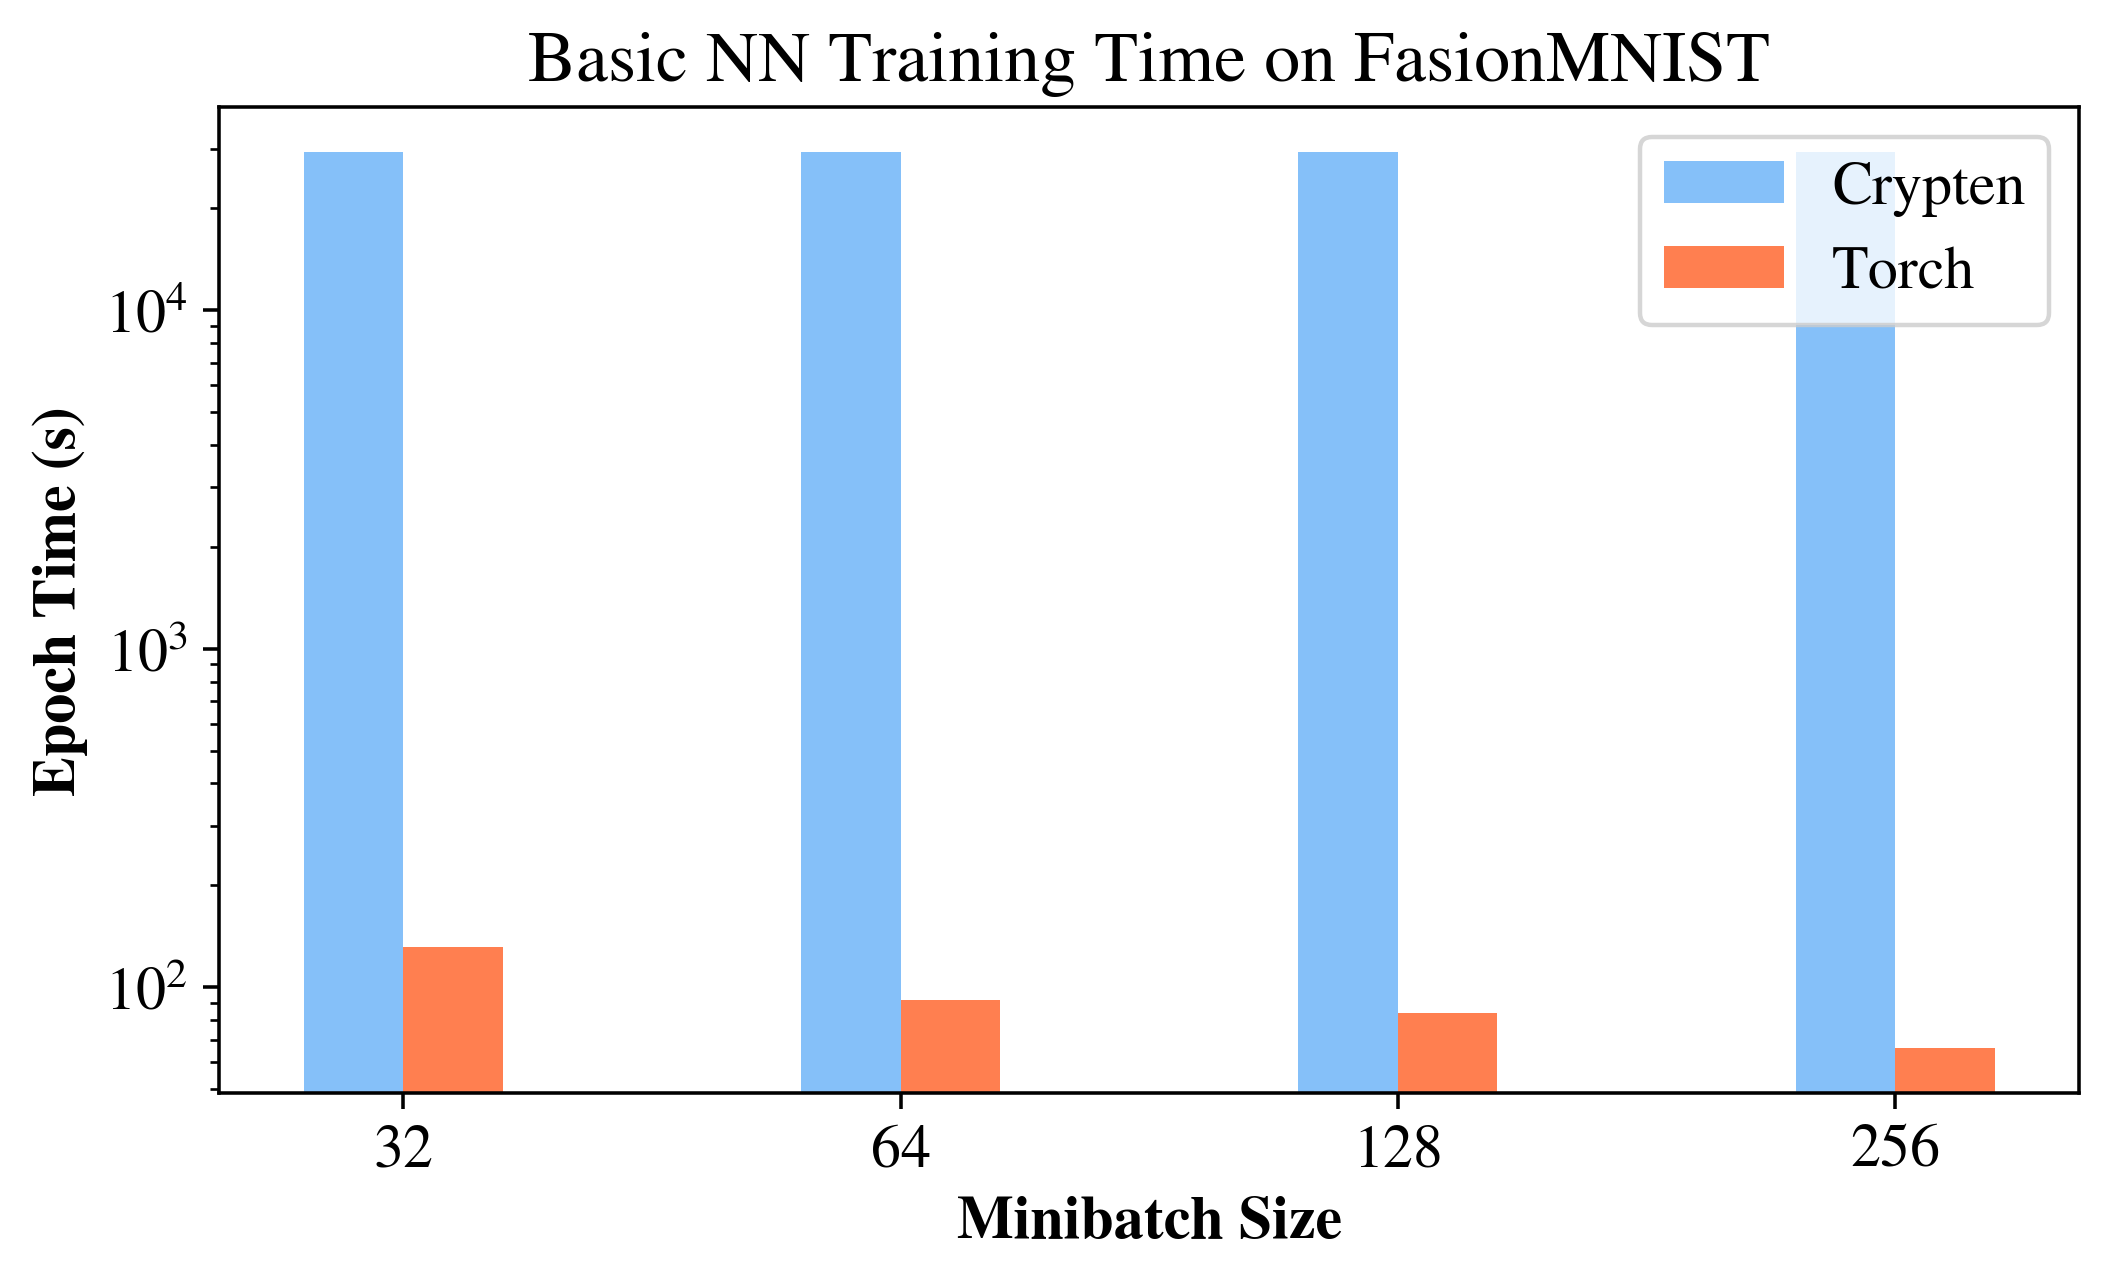

In [9]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis+width/2, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Minibatch Size", fontweight="bold")
plt.ylabel("Epoch Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["32", "64", "128", "256"])

plt.savefig("nn_minibatch.pdf", bbox_inches='tight')

plt.show()

# MNIST Multiparty

In [10]:
crypten_data = pd.read_csv('crypten_experiments/multiparty_nn.csv')
crypten_data = crypten_data.groupby(['epoch','num_parties']).mean().reset_index()
print(crypten_data)

   epoch  num_parties  epoch_duration  batch_size  data_size  accuracy  \
0      0            2     2512.101971        64.0    60000.0    0.4680   
1      0            3     4094.846200        64.0    60000.0    0.5147   
2      0            4     5387.907539        64.0    60000.0    0.4106   
3      1            2     2516.111241        64.0    60000.0    0.6237   
4      1            3     4093.155869        64.0    60000.0    0.5773   
5      1            4     5332.713014        64.0    60000.0    0.5353   
6      2            2     2605.024181        64.0    60000.0    0.6266   
7      2            3     4105.984863        64.0    60000.0    0.6178   
8      2            4     5333.364929        64.0    60000.0    0.6131   

   test_duration  
0     119.040845  
1     196.728847  
2     239.626731  
3     124.337788  
4     193.901795  
5     236.927318  
6     123.654805  
7     194.169129  
8     237.122672  


In [11]:
torch_data = pd.read_csv('torch/datasize_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         0.875358      0          64       7500    0.1417       0.879931
1         0.871688      1          64       7500    0.1724       0.878448
2         0.870825      2          64       7500    0.2134       0.879690
3         1.741135      0          64      15000    0.3777       0.873583
4         1.739863      1          64      15000    0.4535       0.871511
5         1.742037      2          64      15000    0.4702       0.871598
6         3.475538      0          64      30000    0.5205       0.869016
7         3.471764      1          64      30000    0.5447       0.870302
8         3.465229      2          64      30000    0.5653       0.868783
9         6.932861      0          64      60000    0.6035       0.865876
10        6.886341      1          64      60000    0.6297       0.865445
11        6.893277      2          64      60000    0.6451       0.869466


In [12]:
nvflare_data = pd.read_csv('chz-sok-nvflare-experiments/data/total_runtimes_mnist.csv')
print(nvflare_data)


   total_runtime  batch_size  data_size  num_agents
0      27.462248          64       7500           2
1      30.414239          64      15000           2
2      33.363375          64      30000           2
3      37.291058          64      60000           2
4      36.947754          64      60000           3
5      39.968952          64      60000           4


In [13]:
mean_crypten = crypten_data.groupby('num_parties')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].sum()
mean_torch = [mean_torch[60000]]*3
print(mean_torch)
total_nvflare = nvflare_data[nvflare_data['data_size'] == 60000]['total_runtime']
print(total_nvflare)

num_parties
2     7633.237392
3    12293.986931
4    16053.985482
Name: epoch_duration, dtype: float64
[20.71247993595898, 20.71247993595898, 20.71247993595898]
3    37.291058
4    36.947754
5    39.968952
Name: total_runtime, dtype: float64


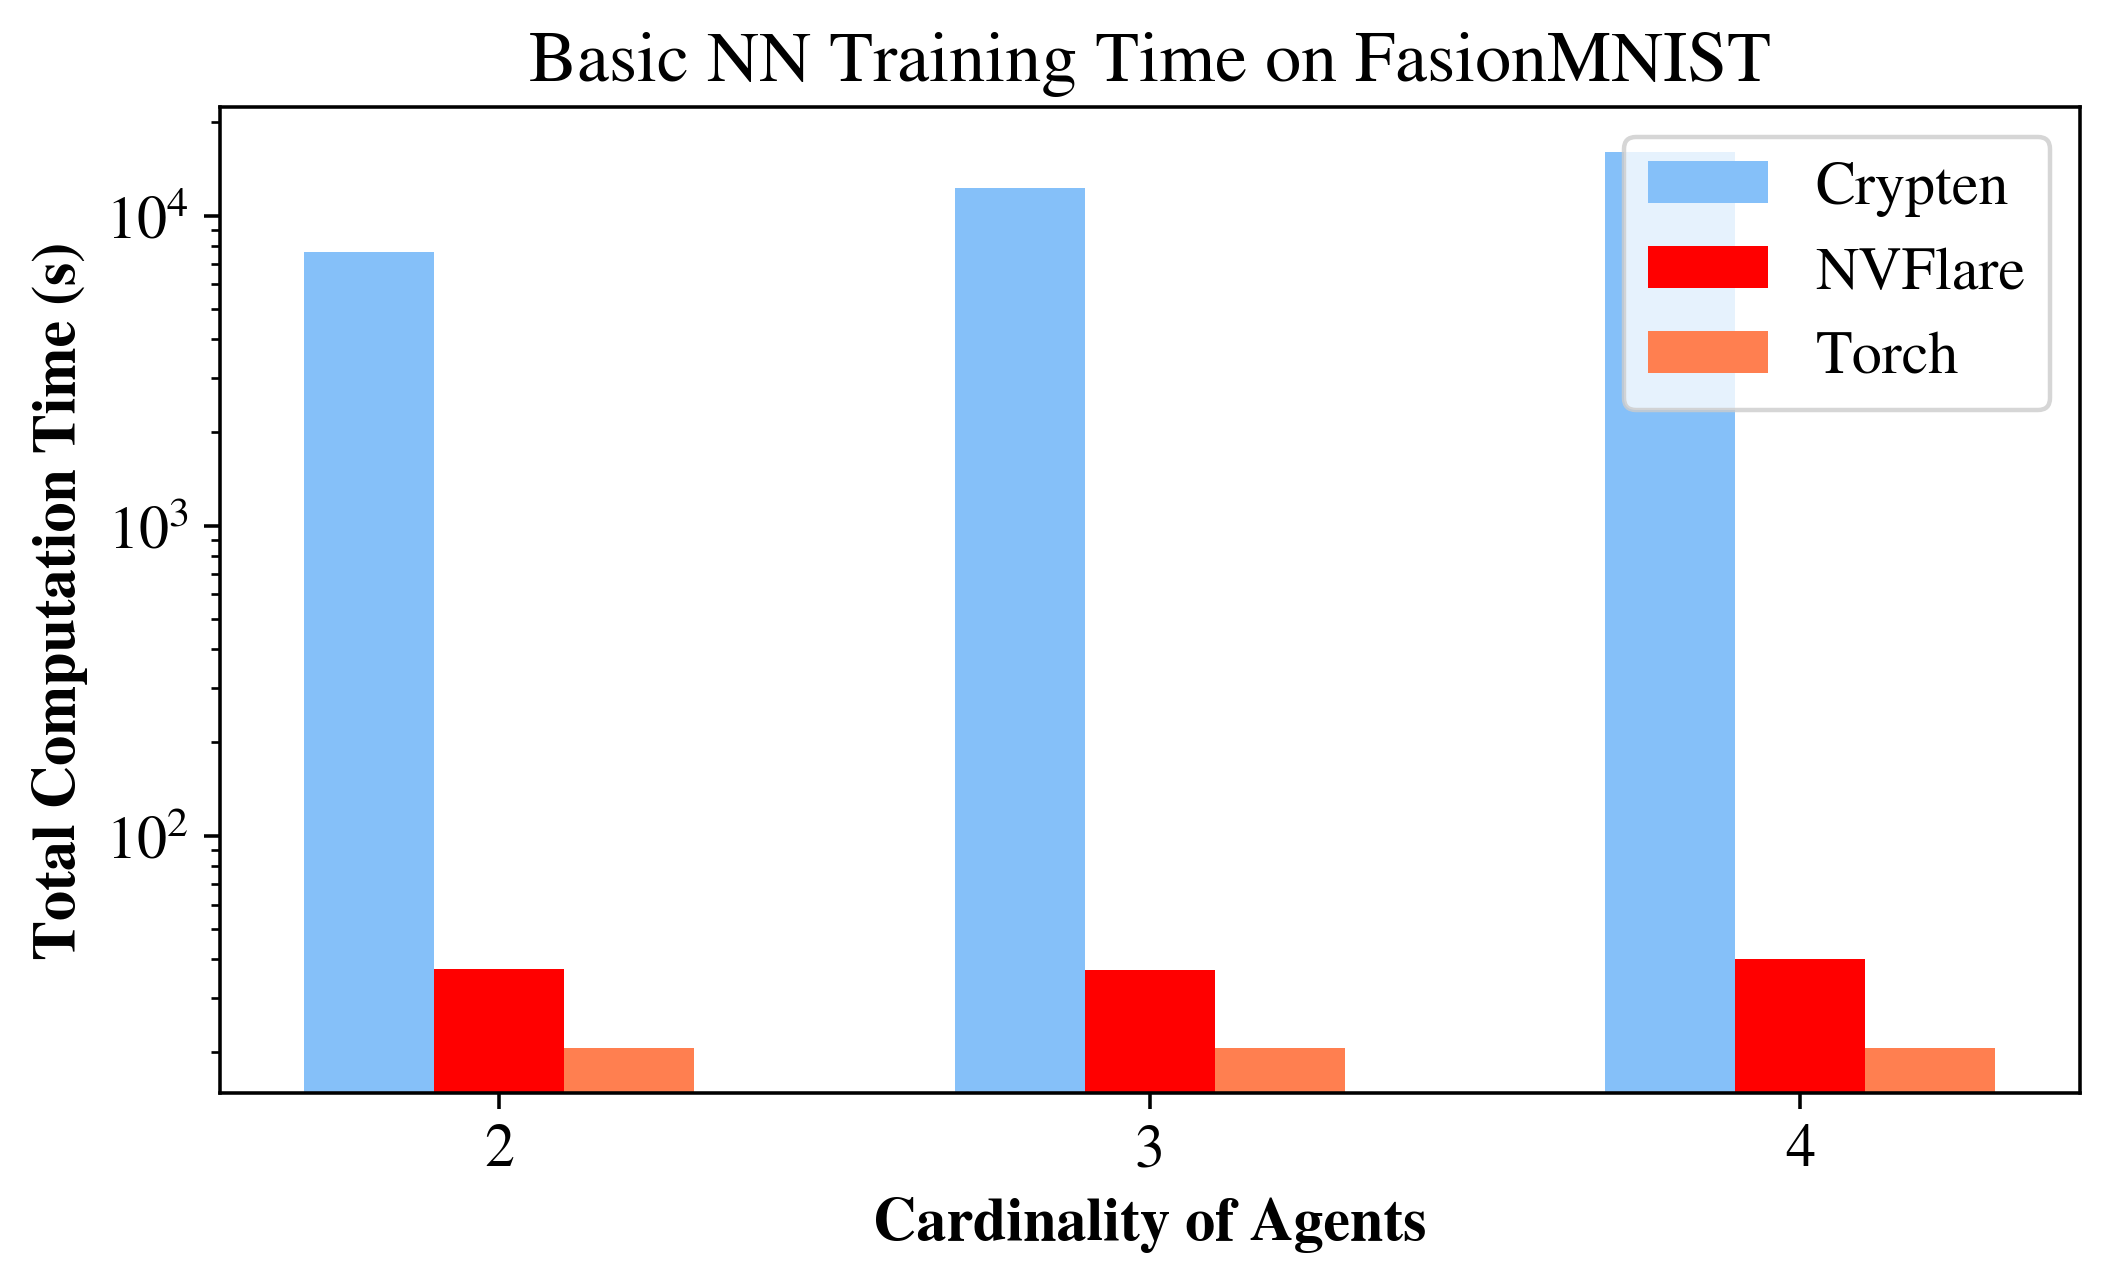

In [14]:
X_axis = np.arange(3)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis, width=width, height = total_nvflare, label = "NVFlare", color='red')
plt.bar(x=X_axis+width, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Cardinality of Agents", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, [2,3,4])

plt.savefig("multiparty_mnist_nn.pdf", bbox_inches='tight')

plt.show()

# CIFAR-10 Datasize

In [15]:
crypten_data = pd.read_csv('crypten_experiments/datasize_cifar_nn.csv', skiprows=(lambda x: (x % 2 != 0)))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      2541.465446      0           4       7500    0.1416    1816.052601
1      2590.844796      1           4       7500    0.1507    1841.071766
2      2610.943532      2           4       7500    0.1558    1844.078777
3      5231.356476      0           4      15000    0.1254    1847.356387
4      5228.616836      1           4      15000    0.1533    1836.973446
5      5231.585884      2           4      15000    0.2129    1836.477785
6     10321.605624      0           4      30000    0.1361    1825.211917
7     10479.325909      1           4      30000    0.2587    1905.839594
8     10910.824670      2           4      30000    0.3095    1862.849678
9     17390.612694      0           4      50000    0.2108    1837.906800
10    17500.806202      1           4      50000    0.3117    1851.253568
11    17523.307491      2           4      50000    0.3963    1833.745015


In [16]:
torch_data = pd.read_csv('torch/datasize_cifar_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         3.894230      0           4       7500    0.1032       3.021972
1         3.875710      1           4       7500    0.1304       3.021197
2         3.910347      2           4       7500    0.1352       3.043607
3         7.821767      0           4      15000    0.1219       3.037747
4         7.795514      1           4      15000    0.1531       3.027073
5         7.786953      2           4      15000    0.1582       3.012410
6        15.624297      0           4      30000    0.1709       3.050010
7        15.642264      1           4      30000    0.2689       3.050948
8        15.664755      2           4      30000    0.3410       3.047203
9        25.906126      0           4      50000    0.1747       2.998784
10       25.910406      1           4      50000    0.3497       3.017611
11       25.935430      2           4      50000    0.4133       3.012618


In [17]:
nvflare_epoch_data = pd.read_csv('chz-sok-nvflare-experiments/data/datasize_cifar_nn.csv')
nvflare_epoch_data = nvflare_epoch_data.iloc[lambda x: x.index % 6 < 3].reset_index(drop=True)
nvflare_epoch_data = nvflare_epoch_data[nvflare_epoch_data["batch_size"] == 4.0]
# nvflare_data = nvflare_data.iloc[::6].reset_index(drop=True)
print(nvflare_epoch_data)

nvflare_data = pd.read_csv('chz-sok-nvflare-experiments/data/total_runtimes_cifar.csv')
nvflare_data = nvflare_data[nvflare_data["batch_size"] == 4.0]
print(nvflare_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0        13.391746    0.0         4.0    50000.0       NaN            NaN
1        13.203454    0.0         4.0    50000.0       NaN            NaN
2        13.261821    0.0         4.0    50000.0       NaN            NaN
3         7.972630    0.0         4.0    30000.0       NaN            NaN
4         7.967436    0.0         4.0    30000.0       NaN            NaN
5         7.945783    0.0         4.0    30000.0       NaN            NaN
6         4.006084    0.0         4.0    15000.0       NaN            NaN
7         3.972016    0.0         4.0    15000.0       NaN            NaN
8         3.971599    0.0         4.0    15000.0       NaN            NaN
9         2.034443    0.0         4.0     7500.0       NaN            NaN
10        1.983217    0.0         4.0     7500.0       NaN            NaN
11        1.979934    0.0         4.0     7500.0       NaN            NaN
   total_runtime  batch_size  data_siz

In [18]:
mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].sum()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].sum()
print(mean_torch)
total_nvflare = nvflare_data.groupby('data_size')['total_runtime'].sum()
print(total_nvflare)

data_size
7500      7743.253773
15000    15691.559196
30000    31711.756203
50000    52414.726387
Name: epoch_duration, dtype: float64
data_size
7500     11.680287
15000    23.404234
30000    46.931316
50000    77.751962
Name: epoch_duration, dtype: float64
data_size
7500     36.666779
15000    42.758883
30000    54.892391
50000    73.003241
Name: total_runtime, dtype: float64


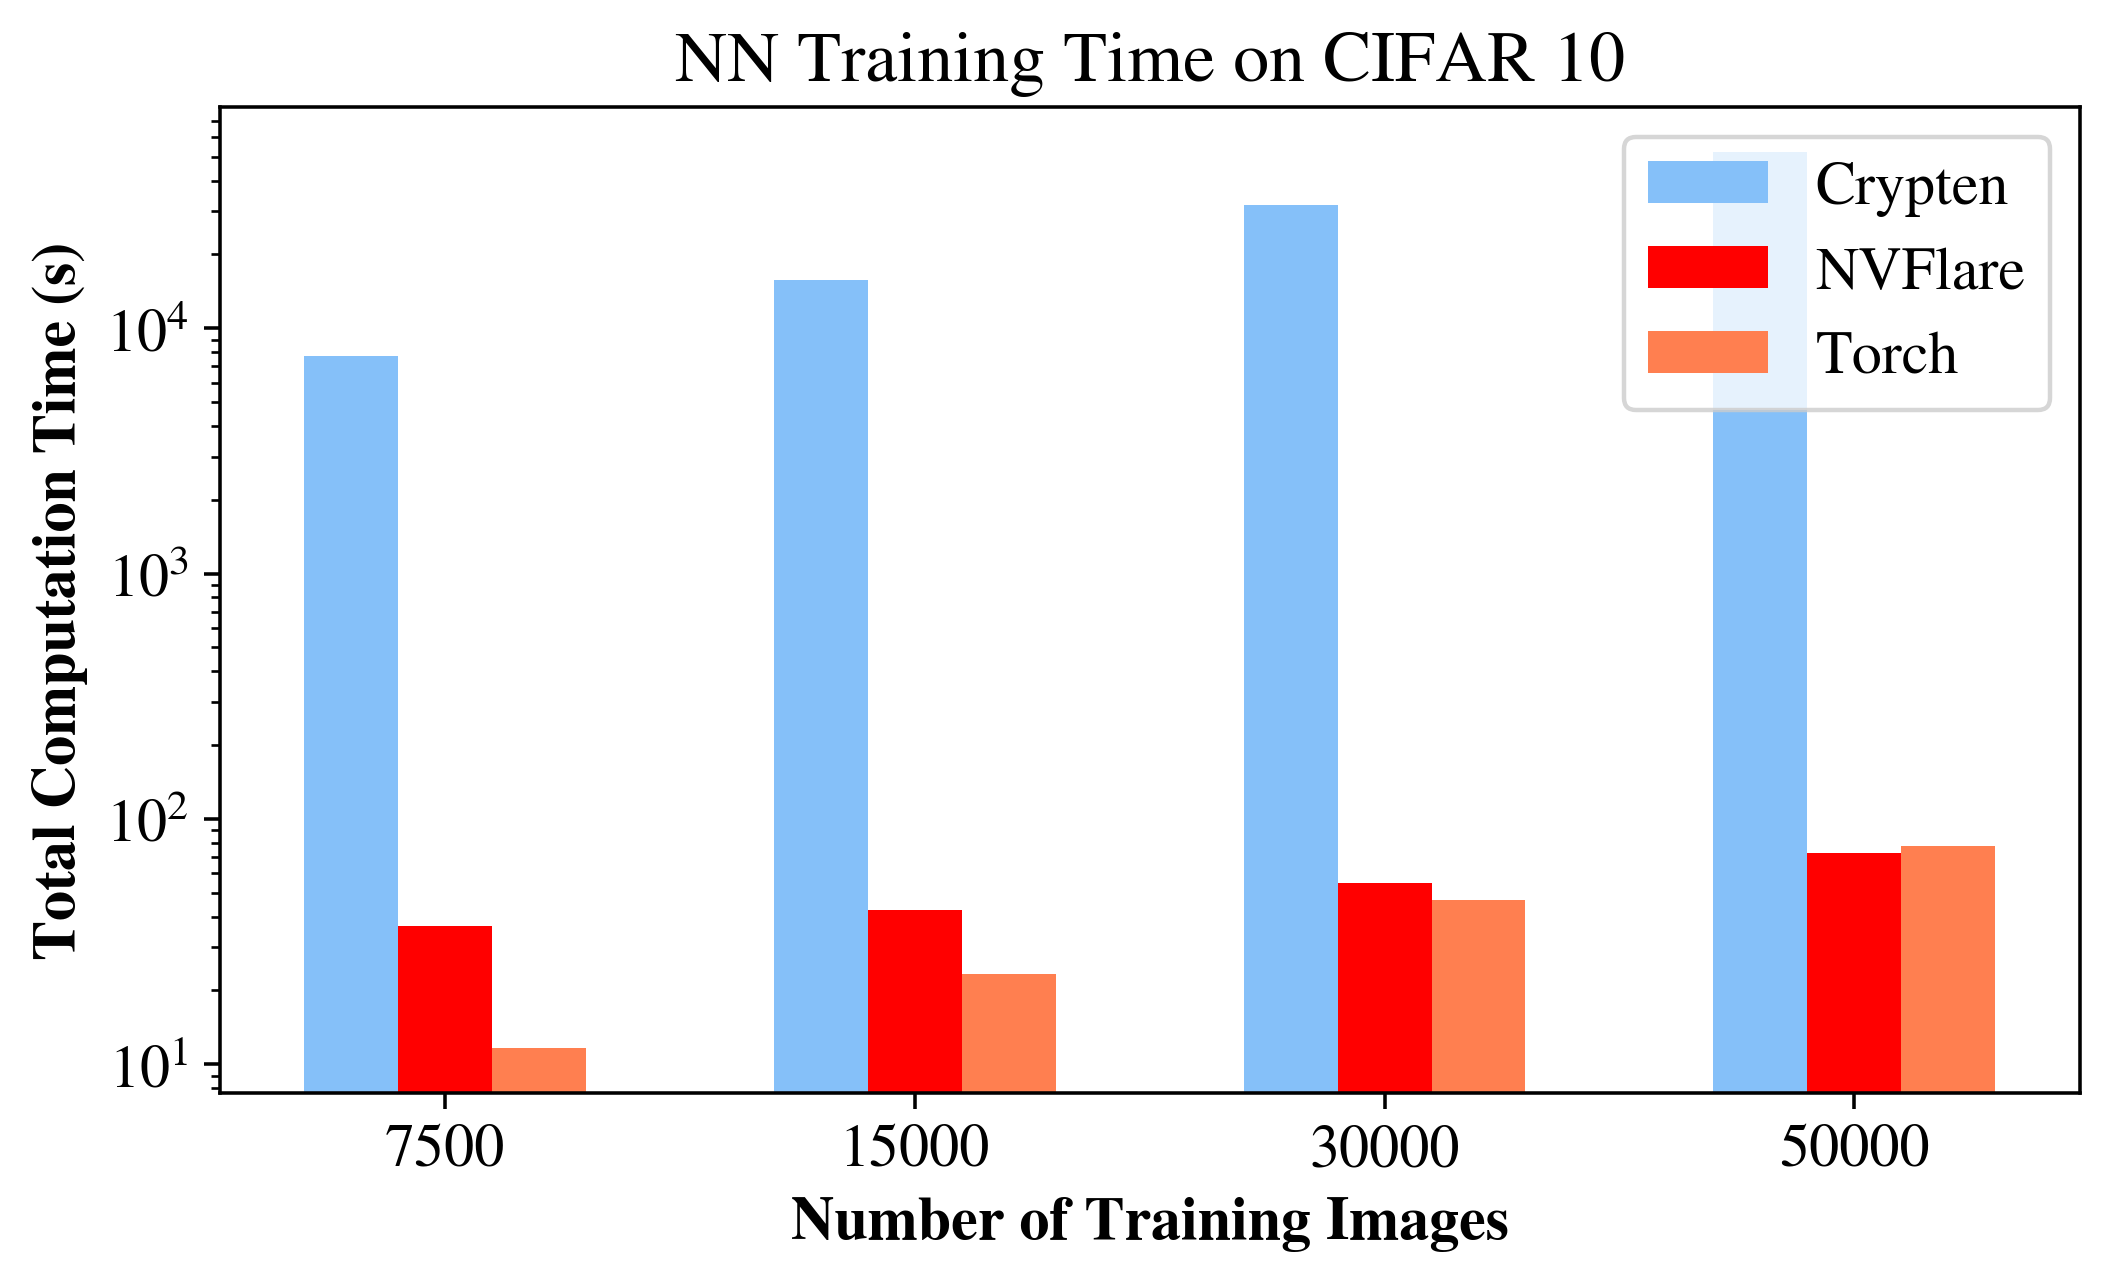

In [19]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis, width=width, height = total_nvflare, label = "NVFlare", color='red')
plt.bar(x=X_axis+width, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Total Computation Time (s)", fontweight="bold")
plt.title("NN Training Time on CIFAR 10")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "50000"])

plt.savefig("datasize_cifar_nn.pdf", bbox_inches='tight')

plt.show()